<a href="https://colab.research.google.com/github/priyanka011011/AI/blob/master/Parametric%26Non_Parametric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRINCIPAL COMPONENT ANALYSIS**

 ##### Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.
 

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/customerdata.csv',index_col = 'ID')
df.head() 

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.describe(include = "all")

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [ ]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [ ]:
df['Warehouse_block']= df['Warehouse_block'].map({'D':0,'F':1,'A':2,'B':3,'C':4})

In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,0,Flight,4,2,177,3,low,F,44,1233,1
2,1,Flight,4,5,216,2,low,M,59,3088,1
3,2,Flight,2,2,183,4,low,M,48,3374,1
4,3,Flight,3,3,176,4,medium,M,10,1177,1
5,4,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [ ]:
df['Mode_of_Shipment']= df['Mode_of_Shipment'].map({'Flight':0,'Ship':1,'Road':2})

In [ ]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df['Product_importance']= df['Product_importance'].map({'low':0,'medium':1,'high':2})

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Gender']= df['Gender'].map({'F':0,'M':1})

In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,0,0,4,2,177,3,0,0,44,1233,1
2,1,0,4,5,216,2,0,1,59,3088,1
3,2,0,2,2,183,4,0,1,48,3374,1
4,3,0,3,3,176,4,1,1,10,1177,1
5,4,0,2,2,184,3,1,0,46,2484,1


In [ ]:
df.shape

(10999, 11)

In [ ]:
X = df.drop('Reached.on.Time_Y.N',axis=1)
y = df['Reached.on.Time_Y.N']

In [ ]:
X.shape

(10999, 10)

In [ ]:
y.shape

(10999,)

In [ ]:
y.value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [ ]:
explained_variance

array([0.16332927, 0.13579861, 0.10343206, 0.10133435, 0.10006833,
       0.09986281, 0.09781179, 0.08679288])

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Plotting a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [ ]:

from sklearn.metrics import accuracy_score

print(cm)
print('\nAccuracy for Logistic Regression model : ' + str(accuracy_score(y_test, y_pred)))

[[483 425]
 [366 926]]

Accuracy for Logistic Regression model : 0.6404545454545455


Text(0, 0.5, 'Second Principal Component')

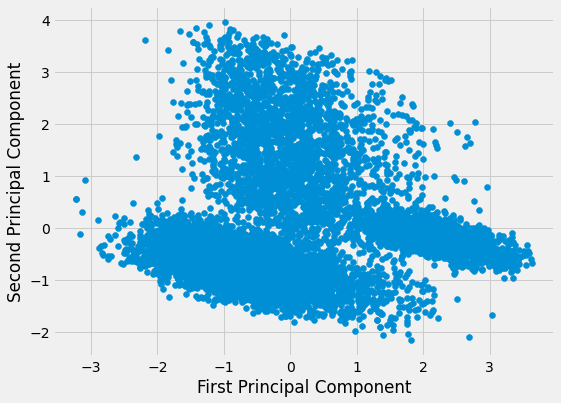

In [ ]:
plt.figure(figsize =(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1])
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:

# from sklearn.decomposition import PCA

# # Instantiate PCA and Determine transformed features

# pca = PCA(n_components=7).fit(Train_X_std)

# fig, ax = plt.subplots(figsize=(8,6))
# x_values = range(1, pca.n_components_+1)
# ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
# ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
# plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
# ax.set_title('Explained variance of components')
# ax.set_xlabel('Principal Component')
# ax.set_ylabel('Explained Variance')
# plt.legend()
# plt.grid()
# plt.show()


##**Linear Discriminant Analysis**

 Linear Discriminant Analysis as its name suggests is a linear model for classification and dimensionality reduction. Most commonly used for feature extraction in pattern classification problems.

 **Assumptions:**
 
 LDA makes some assumptions about the data:


*   Assumes the data to be distributed normally or Gaussian distribution of data points i.e. each feature must make a bell-shaped curve when plotted.
*   Each of the classes has identical covariance matrices.
However, it is worth mentioning that LDA performs quite well even if the assumptions are violated.

In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# performing preprocessing part
sc = StandardScaler()

X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)


In [ ]:

# Applying LDA function on training
# and testing set of X component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X1_train = lda.fit_transform(X1_train, y1_train)
X1_test = lda.transform(X1_test)

In [ ]:
# Fitting Logistic Regression To the training set
classifier = LogisticRegression(random_state = 100)

classifier.fit(X1_train, y1_train) 
y1_pred = classifier.predict(X1_test)

In [ ]:
# Plotting a confusion matrix
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)
print('\nAccuracy for Logistic Regression Classifier: ' + str(accuracy_score(y1_test, y1_pred)))

[[510 398]
 [383 909]]

Accuracy for Logistic Regression Classifier: 0.645


### **Singular Value Decomposition**
#####The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science



In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_ = sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import TruncatedSVD

print("Original Matrix:")
print(X_,'\n')

svd =  TruncatedSVD(n_components = 2)
X_tran = svd.fit_transform(X_)

print("Singular values: \n")
print(svd.singular_values_, '\n')

print("Transformed Matrix after reducing to 2 features: \n") 
print(X_tran) 

Original Matrix:
[[-1.36420462e+00 -1.76071442e+00 -4.77113150e-02 ... -9.91760464e-01
   1.88998336e+00 -1.46823975e+00]
 [-6.20025349e-01 -1.76071442e+00 -4.77113150e-02 ...  1.00830799e+00
   2.81563557e+00 -3.33893327e-01]
 [ 1.24153919e-01 -1.76071442e+00 -1.79988745e+00 ...  1.00830799e+00
   2.13682395e+00 -1.59002181e-01]
 ...
 [ 1.61251246e+00  2.72556412e-03  8.28376755e-01 ... -9.91760464e-01
  -5.78422524e-01 -1.51593733e+00]
 [-6.20025349e-01  2.72556412e-03  8.28376755e-01 ...  1.00830799e+00
  -7.01842818e-01 -1.48230442e+00]
 [-1.36420462e+00  2.72556412e-03 -1.79988745e+00 ... -9.91760464e-01
  -4.55002229e-01 -1.21996770e+00]] 

Singular values: 

[133.9642159  122.06913629] 

Transformed Matrix after reducing to 2 features: 

[[ 3.28933820e-01  2.59965318e+00]
 [-8.20966188e-04  2.39336412e+00]
 [-1.00690916e+00  2.15350245e+00]
 ...
 [ 2.06266357e+00  4.54151727e-03]
 [ 1.86240666e+00 -1.48872946e-01]
 [-4.98155360e-01  8.85143810e-01]]


**Logistic Regression**

In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Logistic Regression To the training set
classifier = LogisticRegression(random_state = 100)

classifier.fit(X_train, y_train)
y1_pred = classifier.predict(X_test)

# Plotting a confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1) 
print('\nAccuracy for Logistic Regression Classifier: ' + str(accuracy_score(y_test, y_pred)))

[[483 425]
 [366 926]]

Accuracy for Logistic Regression Classifier: 0.6404545454545455


## **INFERENCE**
##### The model performance with **LDA** and **PCA** are 64.59% and 64.5%. The model performance with **SVD** is 62.45%. 

**Non- Parametric KNN**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10]: 
  knn = KNeighborsClassifier(i) 
  knn.fit(X_train,y_train) 
  print("K value  : " , i,"train_score;",knn.score(X_train,y_train), "test_score : ", np.mean(cross_val_score(knn, X_train, y_train,cv=10)))
  

K value  :  1 train_score; 1.0 test_score :  0.6371192729341193
K value  :  2 train_score; 0.8158881691101262 test_score :  0.6447326507394767
K value  :  3 train_score; 0.8190703489032845 test_score :  0.634619660771538
K value  :  4 train_score; 0.7728150926241618 test_score :  0.6501886182645568
K value  :  5 train_score; 0.7761109216956472 test_score :  0.644619919329817
K value  :  6 train_score; 0.7504261847937266 test_score :  0.648370177888096
K value  :  7 train_score; 0.7486077963404932 test_score :  0.644165503154411
K value  :  8 train_score; 0.7342879872712809 test_score :  0.6504171837832247
K value  :  9 train_score; 0.7357654278895329 test_score :  0.6460987434067638
K value  :  10 train_score; 0.7246277986134788 test_score :  0.6538262746923157


In [ ]:
knn=KNeighborsClassifier(10)#knn model taining
knn.fit(X_train,y_train)
knn.score(X_test,y_test) 

0.6404545454545455

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
knn.score(X_test,y_test)

0.6404545454545455